### Can We Predict Who Leaves? A KNN Approach to Churn
#### Project Overview
The project's focus is to train a machine learning model capable of flagging customers who are at risk of churning. The aim of the model is to help the company's customer support team to better direct their efforts in terms of customer retention.

#### Background Information
Customer churn is a major challenge for telecom companies like Syriatel; predicting churn reduces revenue loss by allowing them to take preventive measures like offering promotions or resolving service issues. We aim to use customer data collected by Syriatel to generate patterns associated with customer churn and build a model to flag at-risk customers.

By analysing these patterns, we aim to identify which features are strong indicators of churn. The model will also help evaluate how distance metrics and different values of k affect prediction accuracy, guiding both technical improvements and customer retention strategies.

#### Challenges
1. Imbalance Dataset.
2. Inconsistent scales present in some columns.

#### Solutions
1. Employ resampling techniques to address the imbalance.
2. Transform columns using Standard Scaling and Min max scaling to help in modelling stage.

## Problem Statement
Syriatel faces unpredictable customer churn, that impacts revenue and market share. (**Assumption**)Despite heavy investment in marketing and acquisition, customers leave without warning. In order to identify at-risk customers early, this project will use existing data; usage patterns, subscriptions, and service interactions. All with an aim of early intervention for retention of the customer.

### Objectives
1. Understanding how usage patterns affect customer churn.
2. Factors that cause customer dissatisfaction.
3. Building a model to flag high-risk customers.

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Displaying the first five rows of the data to get a feel of how it looks.

In [6]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


rows and columns

In [ ]:
print(f'{df.shape}, \n{df.columns}')

(3333, 21), 
Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


### EDA
We'll take a look at the distribution of the columns within the data, check if there is any discrepancies and outliers to address, then move into the modelling phase.

In [10]:
df_copy = df.drop('state', axis=1)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

Initial column transformation for use in the EDA process.

In [ ]:
#### transform the categorical columns 
from sklearn.preprocessing import LabelEncoder


df_en = df_copy.copy()

#initiate the encoder
le = LabelEncoder()

#encoding non-numeric columns
for col in df_en.select_dtypes(exclude='number').columns:
    df_en[col] = le.fit_transform(df_en[col])

df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

Visualize the rate of churn against the number of minutes used by the customer.

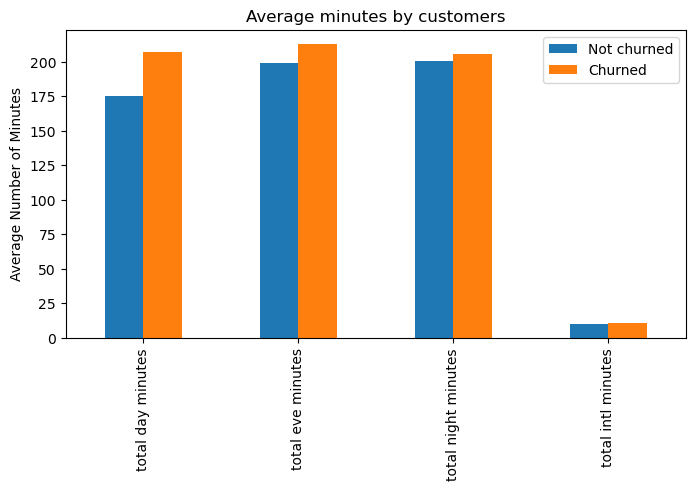

In [20]:
#Objectives
# 1. Understanding how usage patterns affect customer churn.

pattern_columns = ['total day minutes','total eve minutes', 'total night minutes', 'total intl minutes']
df_en.groupby('churn')[pattern_columns].mean().T.plot(kind='bar', figsize=(8, 4))
plt.title('Average minutes by customers')
plt.ylabel('Average Number of Minutes')
plt.legend(['Not churned', 'Churned'])
plt.show()


Customers who churn tend to have higher average usage in total day minutes, total eve minutes, and total night minutes compared to those who do not churn. Therefore, higher daytime, evening, and nighttime usage could indicate that churned customers are heavier users or might be exploring other providers more actively before leaving.

Next up we'll look at how customer service department impacts the churn rate.

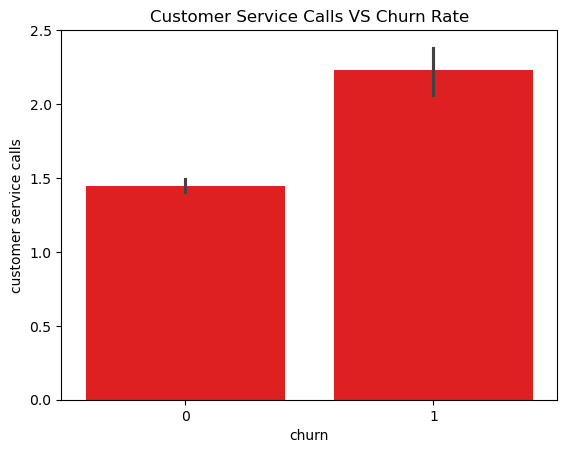

In [ ]:
### Objective
# 2. Factors that cause customer dissatisfaction.
sns.barplot(x='churn', y = 'customer service calls', data=df_en, color='red')
plt.title('Customer Service Calls VS Churn Rate')
plt.show()


Customers who tend to make more calls to customer service are at risk of churning compared to those who make fewer calls. We can recommend identifying the main cause of calling and the assistance given during the call. 

Next, we'll investigate voice mail plan against the churn rate.

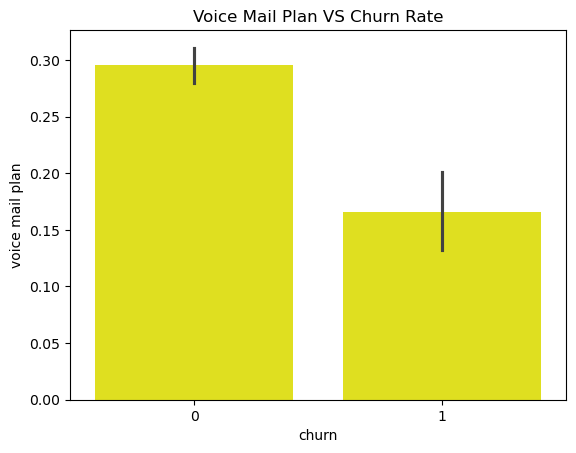

In [ ]:
#barplot for churn vs voice mail plan
sns.barplot(x='churn', y = 'voice mail plan', data=df_en, color='yellow')
plt.title('Voice Mail Plan VS Churn Rate')
plt.show()

Customers who churn tend to have lower voicemail plans compared to those who dont churn. Therefore a low voice mail plan, could be an indicator of a customer at risk of churning.

Lets see if international plan also affects churn rate.

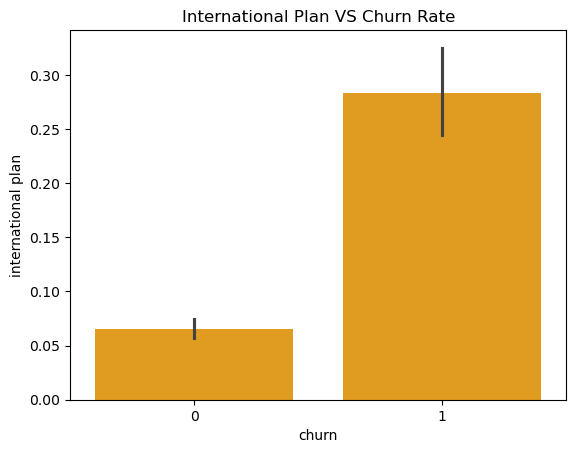

In [ ]:
#churn rate vs international plan
sns.barplot(x='churn', y = 'international plan', data=df_en, color='orange')
plt.title('International Plan VS Churn Rate')
plt.show()

From the graph, most of the customers who churn are heavy users of international plan, this might indicate a flaw in terms of the package ordered, or customers who are about to churn leave the country a lot. So we recommend putting targeted intervention to customers who use the international plan. 

Lets create a machine learning model to help use flag at-risk customers.

### Modelling Phase

In [27]:

### Objectives
# 3. Building a model to flag high-risk customers.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


#separate predictors and target
X = df_en.drop('churn', axis=1)
y = df_en['churn']

#split data 80/20, random_state = 21
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)


In [28]:
#instantiate the model
knn = KNeighborsClassifier(n_neighbors=7)

In [29]:
#training the model
knn.fit(X_train, y_train)

#predict
y_preds = knn.predict(X_test)

In [31]:
#evaluation of the model
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       562
           1       0.80      0.08      0.14       105

    accuracy                           0.85       667
   macro avg       0.83      0.54      0.53       667
weighted avg       0.84      0.85      0.80       667



Interpret the results.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   